In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

2024-07-05 12:16:17.816142: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 12:16:17.819372: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 12:16:17.830520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 12:16:17.852136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 12:16:17.852179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 12:16:17.866653: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
def decode_review(encoded_review):
    word_index = reuters.get_word_index()
    reverse_word_index = dict(
        [(value, key) for key, value in word_index.items()]
    )
    return " ".join([reverse_word_index.get(i-3,"?") for i in encoded_review])

In [4]:
review = decode_review(train_data[3])
review

"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but

In [5]:
def vectorize_data(sequences):
    results = np.zeros((len(sequences), 10000))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

In [6]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
len(y_train[0])

46

In [9]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Since this is multi class classification problem and label are categorically encoded or one-hot encoding. Model need categorical_crossentropy as loss function

In [10]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

2024-07-05 12:16:20.414544: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-05 12:16:20.415036: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2024-07-05 12:16:20.687151: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3735 - loss: 3.2663 - val_accuracy: 0.5880 - val_loss: 1.8869
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6489 - loss: 1.6529 - val_accuracy: 0.6920 - val_loss: 1.4046
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7384 - loss: 1.2294 - val_accuracy: 0.7330 - val_loss: 1.2288
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7805 - loss: 1.0209 - val_accuracy: 0.7460 - val_loss: 1.1296
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8134 - loss: 0.8496 - val_accuracy: 0.7910 - val_loss: 1.0453
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8463 - loss: 0.7135 - val_accuracy: 0.8000 - val_loss: 0.9697
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8755 - loss: 0.5860 - val_accuracy: 0.7960 - val_loss: 0.9388
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8974 - loss: 0.4882 - val_accuracy: 0.8130 - val_loss: 0.

In [13]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

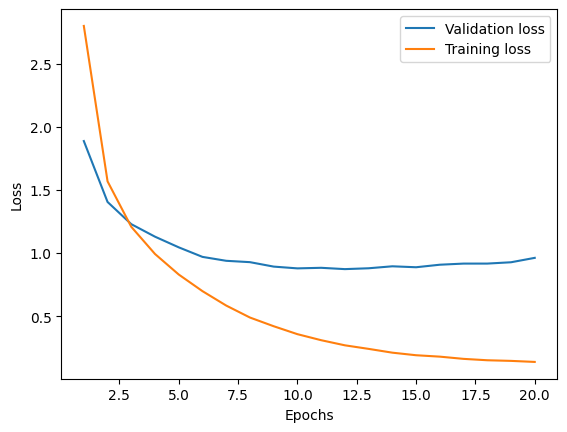

In [14]:
epochs = np.arange(1,21)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

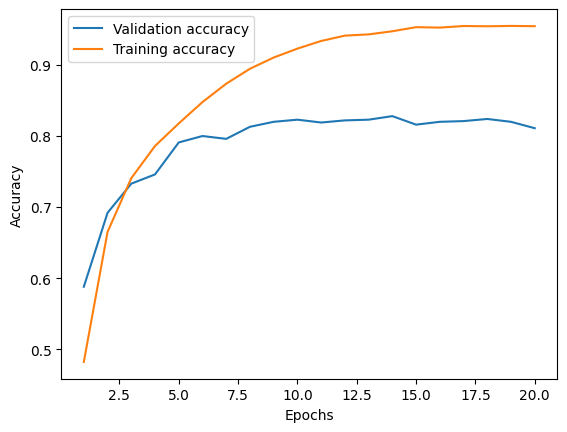

In [15]:
plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
result = model.evaluate(x_test, y_test)
result

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 1.0049


[1.049747347831726, 0.7894033789634705]

Since validation loss increase around 9 epochs so again training with 9 epochs

Epoch 1/9


2024-07-05 12:16:28.818570: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3935 - loss: 3.0644 - val_accuracy: 0.6220 - val_loss: 1.7433
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6747 - loss: 1.5409 - val_accuracy: 0.7010 - val_loss: 1.3617
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7361 - loss: 1.1961 - val_accuracy: 0.7360 - val_loss: 1.1875
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7911 - loss: 0.9548 - val_accuracy: 0.7600 - val_loss: 1.0932
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8259 - loss: 0.8152 - val_accuracy: 0.7600 - val_loss: 1.0340
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8605 - loss: 0.6540 - val_accuracy: 0.8060 - val_loss: 0.9439
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8848 - loss: 0.5442 - val_accuracy: 0.8090 - val_loss: 0.9177
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9070 - loss: 0.4528 - val_accuracy: 0.8080 - val_loss: 0.9005
Ep

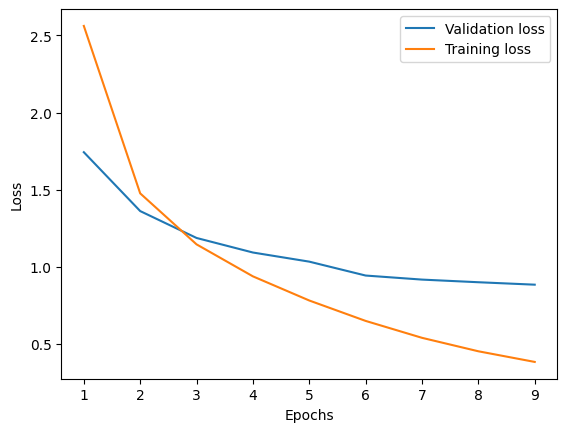

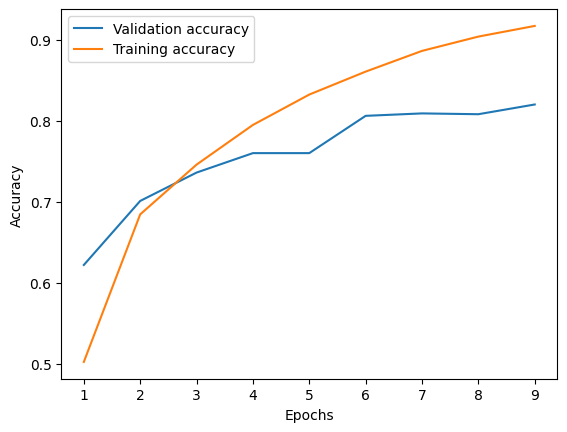

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
history = history.history
history.keys()

epochs = np.arange(1,10)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
result = model.evaluate(x_test, y_test)
result #accuracy increased

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7994 - loss: 0.9312


[0.9551119208335876, 0.7916295528411865]

using single integer to label data. For this using sparse_categorical_crossentropy loss function

Epoch 1/9


2024-07-05 12:22:30.238156: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3299 - loss: 3.3058 - val_accuracy: 0.5730 - val_loss: 1.9664
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6395 - loss: 1.7561 - val_accuracy: 0.6840 - val_loss: 1.4487
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7227 - loss: 1.3162 - val_accuracy: 0.7390 - val_loss: 1.2292
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7833 - loss: 1.0264 - val_accuracy: 0.7660 - val_loss: 1.0985
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8265 - loss: 0.8307 - val_accuracy: 0.7800 - val_loss: 1.0140
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8560 - loss: 0.7032 - val_accuracy: 0.7930 - val_loss: 0.9598
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8799 - loss: 0.5817 - val_accuracy: 0.8110 - val_loss: 0.9046
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9053 - loss: 0.4796 - val_accuracy: 0.8050 - val_loss: 0.8815
Ep

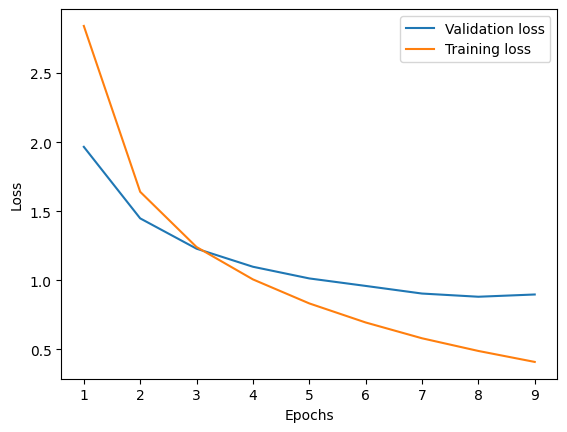

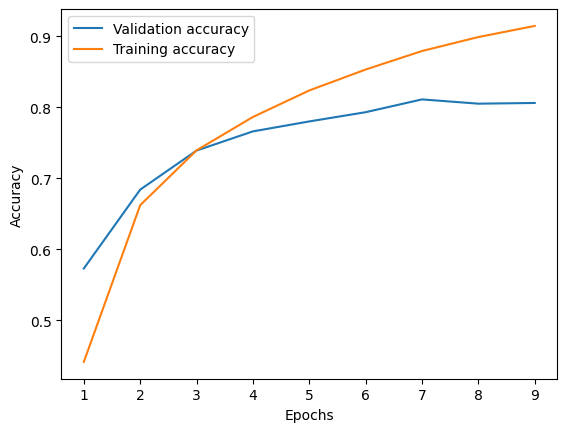

In [19]:
#encoding to array having single integer
y_train_integer_array = np.array(train_labels)

#spliting label into training and validation
partial_y_train_integer_array = y_train_integer_array[1000:]
y_train_integer_array_val = y_train_integer_array[:1000]
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train_integer_array, epochs=9, batch_size=512, validation_data=(x_val, y_train_integer_array_val))
history = history.history
history.keys()

epochs = np.arange(1,10)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using intermediate layer having small number of units

Epoch 1/9


2024-07-05 12:24:56.815242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0583 - loss: 3.5978 - val_accuracy: 0.2200 - val_loss: 3.1077
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2695 - loss: 2.9645 - val_accuracy: 0.5070 - val_loss: 2.6526
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5081 - loss: 2.5260 - val_accuracy: 0.5810 - val_loss: 2.2652
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5783 - loss: 2.1275 - val_accuracy: 0.5910 - val_loss: 1.9516
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5967 - loss: 1.8433 - val_accuracy: 0.5950 - val_loss: 1.7530
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5963 - loss: 1.6648 - val_accuracy: 0.6010 - val_loss: 1.6342
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6129 - loss: 1.5105 - val_accuracy: 0.6110 - val_loss: 1.5586
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6232 - loss: 1.4184 - val_accuracy: 0.6190 - val_loss: 1.5071
Ep

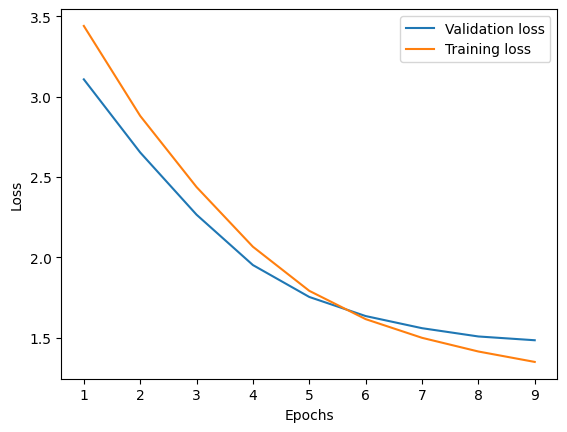

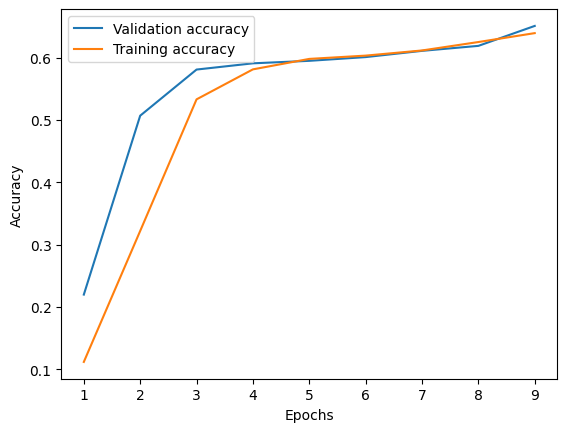

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6269 - loss: 1.5255


[1.5454144477844238, 0.6233303546905518]

In [21]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
history = history.history
history.keys()

epochs = np.arange(1,10)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

result = model.evaluate(x_test,y_test)
result

Accuracy decrease

using more units in first two layers

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4042 - loss: 2.9306 - val_accuracy: 0.6520 - val_loss: 1.5153
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7032 - loss: 1.3539 - val_accuracy: 0.7320 - val_loss: 1.2029
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7757 - loss: 1.0241 - val_accuracy: 0.7490 - val_loss: 1.0817
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8251 - loss: 0.7825 - val_accuracy: 0.7870 - val_loss: 0.9817
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8724 - loss: 0.6024 - val_accuracy: 0.7960 - val_loss: 0.9139
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8937 - loss: 0.4882 - val_accuracy: 0.7940 - val_loss: 0.9012
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9184 - loss: 0.3787 - val_accuracy: 0.8040 - val_loss: 0.8605
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9346 - loss: 0.2988 - val_accuracy: 0.8200 - val_loss:

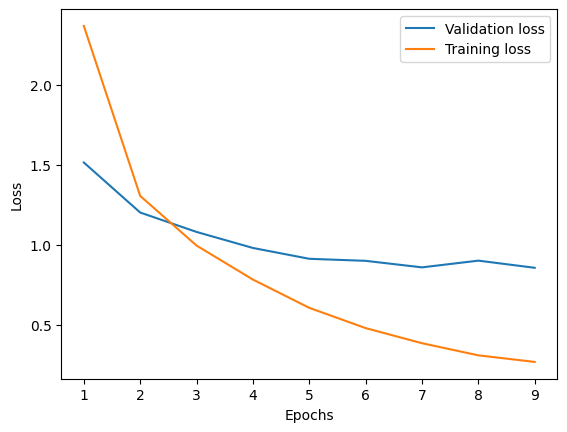

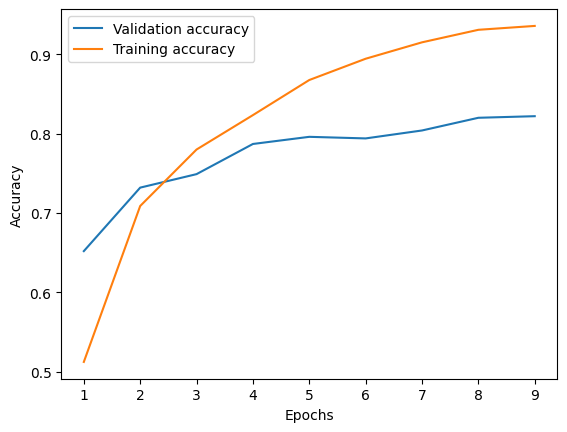

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.9052


[0.9305142760276794, 0.790739119052887]

In [22]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
history = history.history
history.keys()

epochs = np.arange(1,10)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

result = model.evaluate(x_test,y_test)
result

Almost same

Using 2 more layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
history = history.history
history.keys()

epochs = np.arange(1,10)
plt.plot(epochs, history.get("val_loss"), label="Validation loss")
plt.plot(epochs, history.get("loss"), label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, history.get("val_accuracy"), label="Validation accuracy")
plt.plot(epochs, history.get("accuracy"), label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

result = model.evaluate(x_test,y_test)